In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
m = folium.Map(location = [41.9381,-87.6556]) #경도 위도
m

In [ ]:
map_NYC = folium.Map(location =  [41.9381,-87.6556], zoom_start =9)
air_NYC = pd.read_csv("/content/chicago_m (1).csv")
for a in air_NYC.index:
    latitude = air_NYC.loc[a,"latitude"]
    longtitude = air_NYC.loc[a,"longitude"]
    radius = 0.1
    folium.CircleMarker([latitude, longtitude]).add_to(map_NYC)  
map_NYC

In [ ]:
def gen_layout(charttitle, xtitle, ytitle, lmarg, h, annotations=None):  
    """
    Creates whole layout, with both axis, annotations, size and margin
    """
    return go.Layout(title=charttitle, 
                     height=h, 
                     width=800,
                     showlegend=False,
                     xaxis=gen_xaxis(xtitle), 
                     yaxis=gen_yaxis(ytitle),
                     annotations = annotations,
                     margin=dict(l=lmarg),
                    )

In [ ]:
def gen_bars(data, color, orient):
    """
    Generates the bars for plotting, with their color and orient
    """
    bars = []
    for label, label_df in data.groupby(color):
        if orient == 'h':
            label_df = label_df.sort_values(by='x', ascending=True)
        if label == 'a':
            label = 'lightgray'
        bars.append(go.Bar(x=label_df.x,
                           y=label_df.y,
                           name=label,
                           marker={'color': label},
                           orientation = orient
                          )
                   )
    return bars

def gen_annotations(annot):
    """
    Generates annotations to insert in the chart
    """
    if annot is None:
        return []
    
    annotations = []
    # Adding labels
    for d in annot:
        annotations.append(dict(xref='paper', x=d['x'], y=d['y'],
                           xanchor='left', yanchor='bottom',
                           text= d['text'],
                           font=dict(size=13,
                           color=d['color']),
                           showarrow=False))
    return annotations

def generate_barplot(text, annot_dict, orient='v', lmarg=120, h=400):
    """
    Generate the barplot with all data, using previous helper functions
    """
    layout = gen_layout(text[0], text[1], text[2], lmarg, h, gen_annotations(annot_dict))
    fig = go.Figure(data=gen_bars(barplot, 'color', orient=orient), layout=layout)
    return iplot(fig)

def rangeScore(x):
    '''
    Set the bins for the score-range.
    '''
    value = ''
    if (x>= 0 and x < 10):
        value = '0-10'
    elif (x>= 10 and x < 20):
        value = '10-20'
    elif (x>= 20 and x < 30):
        value = '20-30'
    elif (x>= 30.0 and x < 40.0):
        value = '30-40'
    elif (x>= 40 and x < 50):
        value = '40-50'
    elif (x>= 50 and x < 60):
        value = '50-60'
    elif (x>= 60 and x < 70):
        value = '60-70'        
    elif (x>= 70 and x < 80):
        value = '70-80'
    elif (x>= 80 and x < 90):
        value = '80-90'
    elif (x>= 90 and x < 100):
        value = '90-100'
    elif x>= 100:
        value = '100+'
        
    return value

In [ ]:
m = pd.read_csv("/content/chicago_m (1).csv")
w = pd.read_csv("/content/chicago_w (4).csv")

In [ ]:
m

,Unnamed: 0,price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,description,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds,array_amenities,len_amenities,property,w_distance,m_distance
0,6,161.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,0,Corporate Housing fully furnished condo availa...,1,1,100.0,0,41.890090,-87.623043,4,100.0,1.0,1.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",30,apartment,5.98,0.71
1,8,175.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",3,1.0,Real Bed,strict,1,This urban hideaway is located in the heart of...,1,1,100.0,0,41.885621,-87.617409,1,100.0,1.0,1.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",43,apartment,6.64,1.31
2,9,359.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,1,This property offers luxury in Chicago___s tre...,1,1,100.0,0,41.890562,-87.626489,1,80.0,0.0,1.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",21,apartment,5.81,0.69
3,10,85.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,1,All of our furnished apartments are set back i...,1,1,100.0,0,41.902460,-87.632381,14,89.0,0.0,1.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",22,apartment,4.40,0.97
4,22,120.0,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,strict,1,Nice cozy studio in the heart of river north a...,1,1,100.0,1,41.900759,-87.633301,44,90.0,0.0,1.0,"['TV', 'Internet', 'Wireless_Internet', 'Air_c...",18,apartment,4.54,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,2840,100.0,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,1,"With beautiful 15 foot ceilings, abundant ligh...",1,1,100.0,0,41.892274,-87.634046,27,94.0,1.0,1.0,"['TV', 'Internet', 'Wireless_Internet', 'Air_c...",24,apartment,5.40,0.96
342,2849,310.0,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",4,1.5,Real Bed,moderate,0,A bedroom for rent in lovely Old Town neighbor...,1,0,100.0,1,41.908621,-87.637570,14,99.0,1.0,1.0,"['TV', 'Wireless_Internet', 'Air_conditioning'...",21,apartment,3.60,1.77
343,2850,200.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,1,"This clean and spacious, 2nd floor walk up two...",1,1,100.0,1,41.899919,-87.636666,66,96.0,2.0,3.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",27,apartment,4.53,1.13
344,2855,290.0,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,moderate,0,"Our home, built in 1886, offers guests the cha...",1,1,100.0,0,41.912814,-87.636277,60,99.0,2.0,2.0,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",22,apartment,3.23,2.09


# **Michigan Avenue**

Decide the threshold of Top Performer and Low Performer listings.

In [ ]:
# michigan avenue
top75flag = m['review_scores_rating'].quantile(0.75)
upto25flag = m['review_scores_rating'].quantile(0.25)
print(top75flag)
print(upto25flag)
m_top = m[m['review_scores_rating']>=top75flag-0.95]
m_low = m[m['review_scores_rating']<=upto25flag+0.75]
print(len(m_top))
print(len(m_low))

100.0
92.25
100
107


In [ ]:
# wrigely field
top75flag = w['review_scores_rating'].quantile(0.75)
upto25flag = w['review_scores_rating'].quantile(0.25)
print(top75flag)
print(upto25flag)
w_top = w[w['review_scores_rating']>=top75flag]
w_low = w[w['review_scores_rating']<=upto25flag+1]
print(len(w_top))
print(len(w_low))

100.0
93.0
103
105


In [ ]:
'''
the definition and print the value.
'''
top75flag = m['new_score_reviews2'].quantile(0.75)
upto25flag = m['new_score_reviews2'].quantile(0.25)

m['top75'] = m.new_score_reviews2 >= top75flag
m['upto25'] = m.new_score_reviews2 <= upto25flag

print('The boundaries of top performer listings:',top75flag)
print('The boundaries of low performer listings:',upto25flag)

The boundaries of top performer listings: 348.725
The boundaries of low performer listings: 40.0


Visualize the defined class

In [ ]:
### Create a table for the visualization essentials ###
### Generate score bins, creating new tables for the class colors, and count distributions of each bins. ###
# a columns of bins.
m['score_ranges'] = m['new_score_reviews2'].apply(rangeScore)
print(m['score_ranges'])
# table coloring purpose.
top75 = m.groupby('score_ranges', as_index = False)['top75'].max(key = m.count).rename(columns={'score_ranges':'Score'})
upto25 = m.groupby('score_ranges', as_index = False)['upto25'].max(key = m.count).rename(columns={'score_ranges':'Score'})
# count distributions of score bins.
barplot = m[['id','new_score_reviews2']]
barplot['Qty'] = barplot['new_score_reviews2'].apply(rangeScore)
barplot = barplot.Qty.value_counts(sort=True).to_frame().reset_index()
barplot = barplot.rename(columns={'index': 'Score'})

# merging color flag.
barplot = barplot.merge(top75, on = 'Score')
barplot = barplot.merge(upto25)
# creating color for the vis.
barplot['color'] = barplot.top75.apply(lambda x: 'mediumaquamarine' if x else 'lightgray')
# manually change the color of the first index become crimson, to indicate the class of low performer listings.
barplot.iloc[0,4] = 'crimson'
# change Score column and Qty column into x and y for the vis purpose.
barplot = barplot.rename(columns={'Score':'x','Qty':'y'})

# Some of the annotations for the vis.
title_text = ['<b>Comparison Listings Performance between Top Performer and Low Performer</b>', 'Reviews per Month x Review Score Ratings / 10', 'Quantity of Listings']
annotations = [{'x': 0.03, 'y': 1900, 'text': 'Low Performer Had Score Up to 25 Percentile','color': 'gray'},
              {'x': 0.39, 'y': 300, 'text': 'Top Performer Had Score above 90 Percentile','color': 'mediumaquamarine'}]

generate_barplot(title_text, annotations)

0       40-50
1       10-20
2        0-10
3        100+
6        100+
        ...  
507      100+
508    90-100
509      0-10
510      100+
511     60-70
Name: score_ranges, Length: 420, dtype: object


TypeError: ignored

관련없는 열 drop

In [ ]:
irrelevant_colmuns = ['Unnamed: 0','Unnamed: 0.1','id','city','first_review','name','neighbourhood','thumbnail_url','zipcode','top75','upto25']

In [ ]:
relevant_df = .drop(irrelevant_colmuns, axis = 1)

correlation

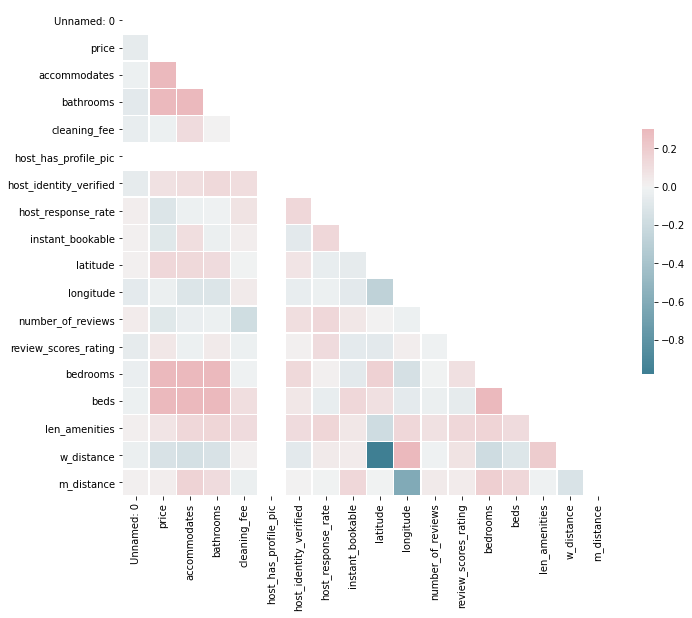

In [ ]:
corr = m.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
A=m.corr().unstack().sort_values(ascending=False)
print('The correlation of the new_score_reviews against all:', A['new_score_reviews2'][1:-1])

The correlation of the new_score_reviews against all: number_of_reviews         0.999395
top75                     0.726816
host_identity_verified    0.111820
instant_bookable          0.057056
id                        0.046292
m_distance                0.035394
review_scores_rating      0.000182
w_distance               -0.002203
zipcode                  -0.004807
bedrooms                 -0.008216
latitude                 -0.009485
bathrooms                -0.030311
longitude                -0.031486
beds                     -0.041276
accommodates             -0.052758
log_price                -0.100011
cleaning_fee             -0.198034
upto25                   -0.375603
dtype: float64


Amenities change into reproduceable column

# **비교그래프**

define them into 2 dataframe class

In [ ]:
top_listings = m[m['new_score_reviews2'] >= np.percentile(m['new_score_reviews2'],75)]
low_listings = m[m['new_score_reviews2'] <= np.percentile(m['new_score_reviews2'],25)]

cleaning_fee

In [ ]:
clean_top_performer = pd.DataFrame(top_listings['cleaning_fee'].reset_index(drop = True))
clean_top_performer['status'] = 'Top Performer'

clean_low_performer = pd.DataFrame(low_listings['cleaning_fee'].reset_index(drop = True))
clean_low_performer['status'] = 'Low Performer'

clean = clean_low_performer.append(clean_top_performer).sample(frac=1)

In [ ]:
bed_top_performer = pd.DataFrame(top_listings['bed_type'].reset_index(drop = True))
bed_top_performer['status'] = 'Top Performer'

bed_low_performer = pd.DataFrame(low_listings['bed_type'].reset_index(drop = True))
bed_low_performer['status'] = 'Low Performer'

bed = bed_low_performer.append(bed_top_performer).sample(frac=1)

Identity verified

In [ ]:
identify_verified_top = pd.DataFrame(top_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_top['status'] = 'Top Performer'

identify_verified_low = pd.DataFrame(low_listings['host_identity_verified'].reset_index(drop = True))
identify_verified_low['status'] = 'Low Performer'

identify_verified = identify_verified_low.append(identify_verified_top).sample(frac=1)

instant bookable

In [ ]:
instantBookable_top_performer = pd.DataFrame(top_listings['instant_bookable'].reset_index(drop = True))
instantBookable_top_performer['status'] = 'Top Performer'

instantBookable_low_performer = pd.DataFrame(low_listings['instant_bookable'].reset_index(drop = True))
instantBookable_low_performer['status'] = 'Low Performer'

host_bookable = instantBookable_low_performer.append(instantBookable_top_performer).sample(frac=1)

cancellation policy

In [ ]:
cancel_top_performer = pd.DataFrame(top_listings['cancellation_policy'].reset_index(drop = True))
cancel_top_performer['status'] = 'Top Performer'

cancel_low_performer = pd.DataFrame(low_listings['cancellation_policy'].reset_index(drop = True))
cancel_low_performer['status'] = 'Low Performer'

cancel = cancel_low_performer.append(cancel_top_performer).sample(frac=1)

room type

In [ ]:
room_top_performer = pd.DataFrame(top_listings['room_type'].reset_index(drop = True))
room_top_performer['status'] = 'Top Performer'

room_low_performer = pd.DataFrame(low_listings['room_type'].reset_index(drop = True))
room_low_performer['status'] = 'Low Performer'

room = room_low_performer.append(room_top_performer).sample(frac=1)

In [ ]:
data= []
data.append(clean)
data.append(identify_verified)
data.append(host_bookable)
data.append(bed)
data.append(cancel)
data.append(room)

0
1
2
3
4
5


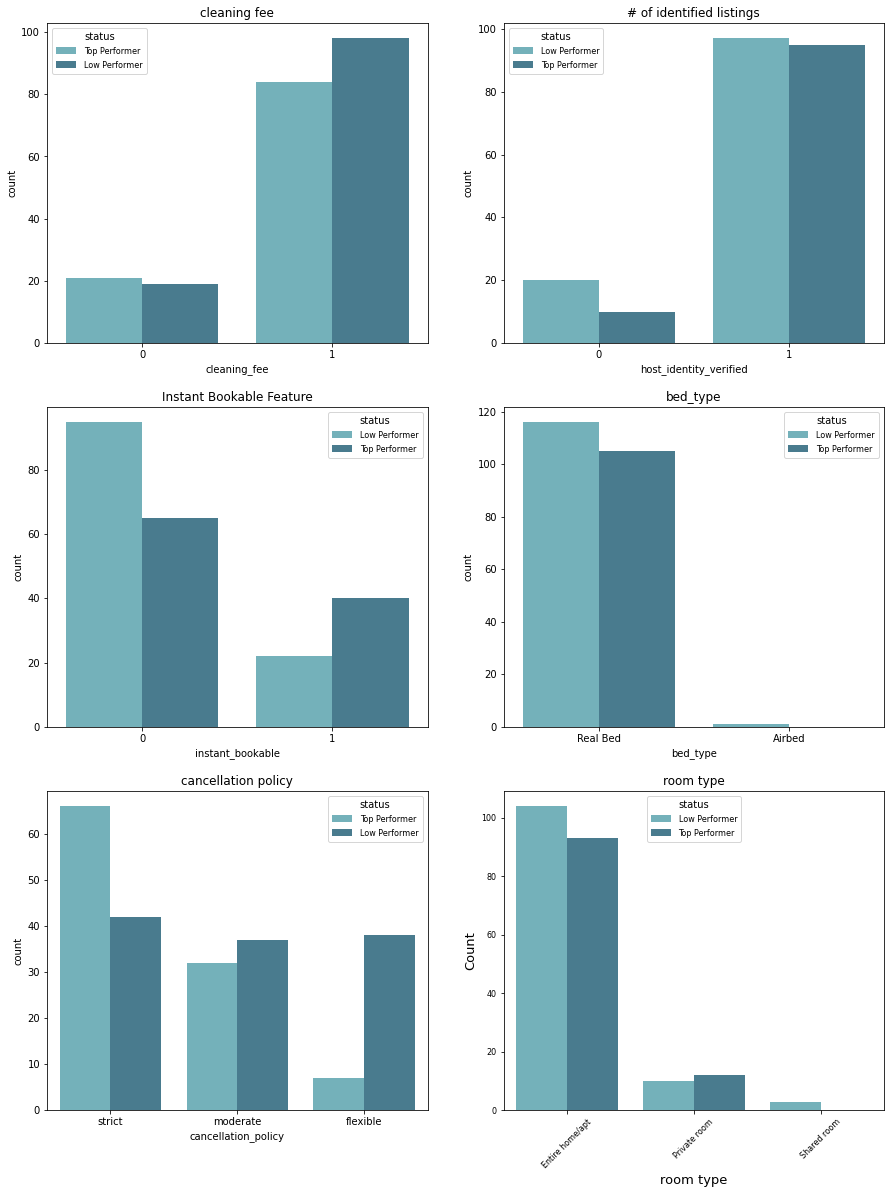

In [ ]:
fig, ax = plt.subplots(figsize=(15,20), nrows=3, ncols=2)
x_data= ['cleaning_fee','host_identity_verified','instant_bookable','bed_type','cancellation_policy','room_type']
title= ['cleaning fee','# of identified listings','Instant Bookable Feature','bed_type','cancellation policy','room type']

x_axis= ['Percentage','Activate/Not','Activate/Not', 'feature','cancellation plicy','room type']
y_axis= ['Count']
cnt=0

for x in range(3):
    for y in range(2):
        print(cnt)
        ax[x][y].set_title(title[cnt], fontsize=12)
        sns.countplot(x=x_data[cnt], hue='status', data=data[cnt], palette='GnBu_d', orient='h', ax=ax[x][y])
        plt.setp(ax[x][y].get_legend().get_texts(), fontsize='8') # for legend text
        plt.setp(ax[x][y].get_legend().get_title(), fontsize='10') # for legend title
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.xlabel(x_axis[cnt], fontsize=13)
        p=plt.ylabel(y_axis[0], fontsize=13)
        
        cnt+=1

# **Michigan avenue top25 amenities**

In [ ]:
m_top_amenities = m_top['amenities']
m_top_amenities.to_csv("m_top_text.csv")

In [ ]:
with open(r'/content/m_top_text.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',amenities\n',
 '0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Pool,Kitchen,Doorman,Gym,""Elevator in building"",""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",""Doorman Entry""}"\n',
 '1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Pool,Kitchen,""Pets allowed"",Doorman,Gym,""Elevator in building"",""Hot tub"",""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Hot water"",""Bed l

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',amenities 0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Pool,Kitchen,Doorman,Gym,""Elevator in building"",""Hot tub"",""Indoor fireplace"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",""Doorman Entry""}" 1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",""Wheelchair accessible"",Pool,Kitchen,""Pets allowed"",Doorman,Gym,""Elevator in building"",""Hot tub"",""Indoor fireplace"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",""Suitable for events"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Hot water"",""Bed linens"",Micro

In [ ]:
#특수문자 제거
import re
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' amenities 0   TV   Cable TV   Internet   Wireless Internet     Air conditioning     Wheelchair accessible   Pool Kitchen Doorman Gym   Elevator in building     Hot tub     Indoor fireplace   Heating   Family kid friendly     Suitable for events   Washer Dryer   Smoke detector     Carbon monoxide detector     Fire extinguisher   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     Self Check In     Doorman Entry     1   TV   Cable TV   Internet   Wireless Internet     Air conditioning     Wheelchair accessible   Pool Kitchen   Pets allowed   Doorman Gym   Elevator in building     Hot tub     Indoor fireplace     Buzzer wireless intercom   Heating   Family kid friendly     Suitable for events   Washer Dryer   Smoke detector     Carbon monoxide detector     First aid kit     Safety card     Fire extinguisher   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     Hot water     Bed linens   Micro

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [ ]:
text = nltk.word_tokenize(filtered_content)
text

['amenities',
 '0',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Wheelchair',
 'accessible',
 'Pool',
 'Kitchen',
 'Doorman',
 'Gym',
 'Elevator',
 'in',
 'building',
 'Hot',
 'tub',
 'Indoor',
 'fireplace',
 'Heating',
 'Family',
 'kid',
 'friendly',
 'Suitable',
 'for',
 'events',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Carbon',
 'monoxide',
 'detector',
 'Fire',
 'extinguisher',
 'Essentials',
 'Shampoo',
 '24',
 'hour',
 'check',
 'in',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'friendly',
 'workspace',
 'Self',
 'Check',
 'In',
 'Doorman',
 'Entry',
 '1',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Wheelchair',
 'accessible',
 'Pool',
 'Kitchen',
 'Pets',
 'allowed',
 'Doorman',
 'Gym',
 'Elevator',
 'in',
 'building',
 'Hot',
 'tub',
 'Indoor',
 'fireplace',
 'Buzzer',
 'wireless',
 'intercom',
 'Heating',
 'Family',
 'kid',
 'friendly',
 'Suitable',
 'for',
 'events',
 'Was

In [ ]:
from collections import Counter
c= Counter(text)
print(c.most_common(30))  # carbon monoxide, gym이 있다는 특징

[('Internet', 177), ('detector', 156), ('friendly', 155), ('TV', 151), ('in', 127), ('Heating', 99), ('Wireless', 98), ('Kitchen', 98), ('Air', 97), ('conditioning', 97), ('Essentials', 96), ('Washer', 92), ('Dryer', 92), ('Shampoo', 87), ('Smoke', 86), ('Hair', 83), ('dryer', 83), ('Laptop', 82), ('workspace', 82), ('Hangers', 81), ('Iron', 78), ('Elevator', 77), ('building', 77), ('Family', 73), ('kid', 73), ('Carbon', 70), ('monoxide', 70), ('Doorman', 65), ('Gym', 62), ('Cable', 58)]


# **Michigan Avenue low25 amenities**

In [ ]:
m_low_amenities = m_low['amenities']
m_low_amenities.to_csv("m_low_text.csv")

In [ ]:
with open(r'/content/m_low_text.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',amenities\n',
 '2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,Gym,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",""Doorman Entry""}"\n',
 '3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,Doorman,""Elevator in building"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}"\n',
 '4,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}"\n',
 '7,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitche

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',amenities 2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,Gym,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",Essentials,Shampoo,Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""Self Check-In"",""Doorman Entry""}" 3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,Doorman,""Elevator in building"",""Buzzer/wireless intercom"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}" 4,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""translation missing: en.hosting_amenity_50""}" 7,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Pool,Kitchen,Doorman,Gym,""Elevator 

In [ ]:
#특수문자 제거
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' amenities 2   TV   Cable TV   Internet   Wireless Internet     Air conditioning   Pool Kitchen Gym   Elevator in building   Heating Washer Dryer   Smoke detector   Essentials Shampoo Hangers   Hair dryer   Iron   Laptop friendly workspace     Self Check In     Doorman Entry     3   TV   Cable TV   Internet   Wireless Internet     Air conditioning   Kitchen Doorman   Elevator in building     Buzzer wireless intercom   Heating Washer Dryer   Smoke detector     Carbon monoxide detector     Fire extinguisher   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     4   TV Internet   Wireless Internet     Air conditioning   Kitchen   Elevator in building   Heating Washer Dryer   Smoke detector     Carbon monoxide detector   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   translation missing  en hosting_amenity_50     7   TV   Cable TV   Internet   Wireless Internet     Air conditioning   Pool Kitchen Doorman Gym   Elevator 

In [ ]:
text = nltk.word_tokenize(filtered_content)
text

['amenities',
 '2',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Pool',
 'Kitchen',
 'Gym',
 'Elevator',
 'in',
 'building',
 'Heating',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'friendly',
 'workspace',
 'Self',
 'Check',
 'In',
 'Doorman',
 'Entry',
 '3',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Kitchen',
 'Doorman',
 'Elevator',
 'in',
 'building',
 'Buzzer',
 'wireless',
 'intercom',
 'Heating',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Carbon',
 'monoxide',
 'detector',
 'Fire',
 'extinguisher',
 'Essentials',
 'Shampoo',
 '24',
 'hour',
 'check',
 'in',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'friendly',
 'workspace',
 '4',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Kitchen',
 'Elevator',
 'in',
 'building',
 'Heating',
 'Washer',
 'Dryer',
 'Smoke',
 'detector'

In [ ]:
c= Counter(text)
print(c.most_common(30))

[('Internet', 190), ('detector', 173), ('friendly', 159), ('TV', 150), ('in', 140), ('Heating', 105), ('Wireless', 104), ('Kitchen', 103), ('Essentials', 99), ('Air', 98), ('conditioning', 98), ('Smoke', 93), ('Shampoo', 93), ('Washer', 92), ('Dryer', 92), ('Hangers', 88), ('Hair', 87), ('dryer', 87), ('Laptop', 83), ('workspace', 83), ('Elevator', 81), ('building', 81), ('Carbon', 80), ('monoxide', 80), ('Iron', 78), ('Family', 76), ('kid', 76), ('Doorman', 75), ('Cable', 62), ('24', 60)]


# **Wrigely Field Top25 Amenities**

In [ ]:
w_top_amenities = w_top['amenities']
w_top_amenities.to_csv("w_top_text.csv")

In [ ]:
with open(r'/content/w_top_text.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',amenities\n',
 '8,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}"\n',
 '9,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50"",""Self Check-In"",Lockbox}"\n',
 '12,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",Gym,""Hot tub"",""Indoor fireplace"","

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',amenities 8,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}" 9,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Buzzer/wireless intercom"",Heating,""Family/kid friendly"",Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Shampoo,""Lock on bedroom door"",""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_50"",""Self Check-In"",Lockbox}" 12,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",Gym,""Hot tub"",""Indoor fireplace"",""Buzzer/wireless in

In [ ]:
#특수문자 제거
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' amenities 8   TV Internet   Wireless Internet     Air conditioning   Kitchen   Free parking on premises     Buzzer wireless intercom   Heating   Family kid friendly   Washer Dryer   Smoke detector     Carbon monoxide detector     First aid kit     Safety card     Fire extinguisher   Essentials Shampoo   Lock on bedroom door     24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     9   TV   Cable TV   Internet   Wireless Internet     Air conditioning   Kitchen   Buzzer wireless intercom   Heating   Family kid friendly   Washer Dryer   Smoke detector     Carbon monoxide detector     Fire extinguisher   Essentials Shampoo   Lock on bedroom door     24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     translation missing  en hosting_amenity_50     Self Check In   Lockbox   12   TV   Cable TV   Internet   Wireless Internet     Air conditioning   Kitchen   Free parking on premises   Gym   Hot tub     Indoor fireplace     Buzzer wireless in

In [ ]:
text = nltk.word_tokenize(filtered_content)
text

['amenities',
 '8',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Kitchen',
 'Free',
 'parking',
 'on',
 'premises',
 'Buzzer',
 'wireless',
 'intercom',
 'Heating',
 'Family',
 'kid',
 'friendly',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Carbon',
 'monoxide',
 'detector',
 'First',
 'aid',
 'kit',
 'Safety',
 'card',
 'Fire',
 'extinguisher',
 'Essentials',
 'Shampoo',
 'Lock',
 'on',
 'bedroom',
 'door',
 '24',
 'hour',
 'check',
 'in',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'friendly',
 'workspace',
 '9',
 'TV',
 'Cable',
 'TV',
 'Internet',
 'Wireless',
 'Internet',
 'Air',
 'conditioning',
 'Kitchen',
 'Buzzer',
 'wireless',
 'intercom',
 'Heating',
 'Family',
 'kid',
 'friendly',
 'Washer',
 'Dryer',
 'Smoke',
 'detector',
 'Carbon',
 'monoxide',
 'detector',
 'Fire',
 'extinguisher',
 'Essentials',
 'Shampoo',
 'Lock',
 'on',
 'bedroom',
 'door',
 '24',
 'hour',
 'check',
 'in',
 'Hangers',
 'Hair',
 'dryer',
 'Iron',
 'Laptop',
 'fri

In [ ]:
c= Counter(text)
print(c.most_common(30))  # translation, missing

[('detector', 183), ('Internet', 169), ('TV', 140), ('friendly', 130), ('Heating', 102), ('Wireless', 99), ('Kitchen', 98), ('Smoke', 98), ('Essentials', 97), ('Air', 93), ('conditioning', 93), ('Carbon', 85), ('monoxide', 85), ('Shampoo', 85), ('Washer', 79), ('Dryer', 77), ('on', 76), ('Hangers', 76), ('Hair', 71), ('dryer', 71), ('Iron', 67), ('Laptop', 67), ('workspace', 67), ('Family', 63), ('kid', 63), ('translation', 63), ('missing', 63), ('en', 63), ('Fire', 62), ('extinguisher', 62)]


# **Wrigely Field Low25 Amenities**

In [ ]:
w_low_amenities = w_low['amenities']
w_low_amenities.to_csv("w_low_text.csv")

In [ ]:
with open(r'/content/w_low_text.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',amenities\n',
 '1,"{Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Hangers,""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}"\n',
 '5,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}"\n',
 '7,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Smoking allowed"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}"\n',
 '1

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',amenities 1,"{Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""Fire extinguisher"",Essentials,Hangers,""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}" 5,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Elevator in building"",Heating,Washer,Dryer,""Smoke detector"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace""}" 7,"{TV,Internet,""Wireless Internet"",""Air conditioning"",Kitchen,""Free parking on premises"",""Smoking allowed"",Heating,Washer,Dryer,""Smoke detector"",""Carbon monoxide detector"",""First aid kit"",""Safety card"",""Fire extinguisher"",Essentials,Shampoo,""24-hour check-in"",Hangers,""Hair dryer"",Iron,""Laptop friendly workspace"",""translation missing: en.hosting_amenity_49"",""translation missing: en.hosting_amenity_50""}" 11,"{TV,""Wireless Interne

In [ ]:
#특수문자 제거
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' amenities 1   Internet   Wireless Internet     Air conditioning   Kitchen   Elevator in building   Heating Washer Dryer   Smoke detector     Carbon monoxide detector     Fire extinguisher   Essentials Hangers   translation missing  en hosting_amenity_49     translation missing  en hosting_amenity_50     5   TV Internet   Wireless Internet     Air conditioning   Kitchen   Elevator in building   Heating Washer Dryer   Smoke detector   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     7   TV Internet   Wireless Internet     Air conditioning   Kitchen   Free parking on premises     Smoking allowed   Heating Washer Dryer   Smoke detector     Carbon monoxide detector     First aid kit     Safety card     Fire extinguisher   Essentials Shampoo   24 hour check in   Hangers   Hair dryer   Iron   Laptop friendly workspace     translation missing  en hosting_amenity_49     translation missing  en hosting_amenity_50     11   TV   Wireless Interne

In [ ]:
text = nltk.word_tokenize(filtered_content)
c= Counter(text)
print(c.most_common(35))

[('Internet', 177), ('detector', 163), ('TV', 125), ('friendly', 122), ('Heating', 102), ('Kitchen', 101), ('Wireless', 100), ('Air', 94), ('conditioning', 94), ('Essentials', 94), ('Smoke', 92), ('Washer', 81), ('Dryer', 79), ('Shampoo', 79), ('Carbon', 71), ('monoxide', 71), ('Hangers', 66), ('Hair', 66), ('dryer', 66), ('translation', 64), ('missing', 64), ('en', 64), ('in', 63), ('Laptop', 62), ('workspace', 62), ('Family', 60), ('kid', 60), ('Iron', 58), ('on', 58), ('Fire', 50), ('extinguisher', 50), ('24', 43), ('hour', 43), ('check', 43), ('hosting_amenity_50', 39)]
